# Using SVD for Image Compression

In this example, I will use a PNG image of Will Rice's Beer Bike team. This image will be compressed with two different singular values "values".

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

The following code first starts by converting the image into RGB channels which are the three matrices the image's original matrix will be converted into. Next, the image is turned into a NumPy array as SVD requires matrix multiplication.

The loop then applies SVD to each color channel, keeps only the top k/singular values, reconstructs a lower-rank approximation, and then assembles the compressed RGB image.

Now, once the image is loaded in and two different k values are selected, the images are compressed and then displayed next to each other.

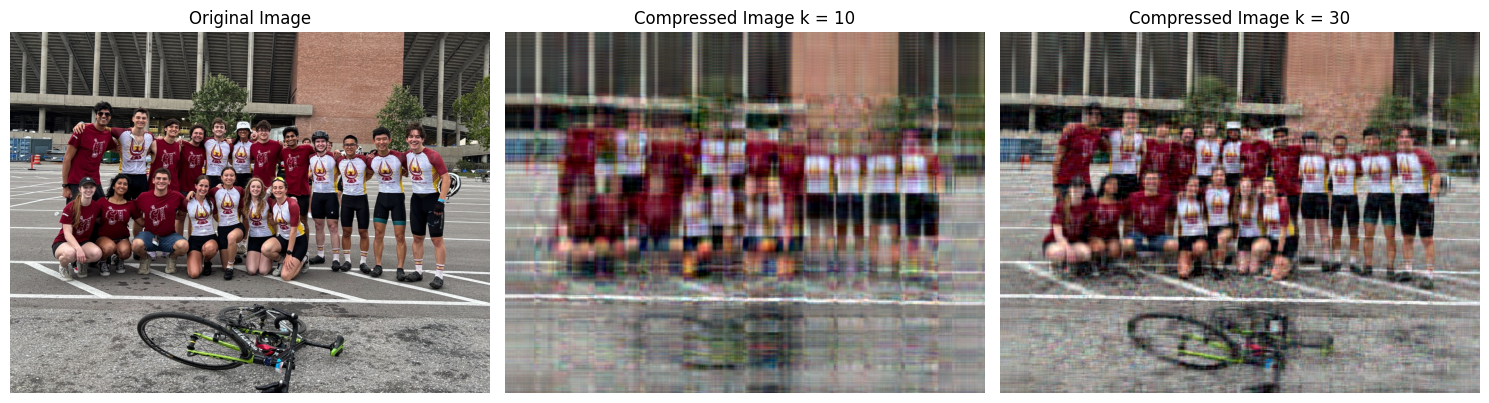

In [ ]:
def compress_image_svd(image_path, k):
    original_img = Image.open(image_path).convert('RGB')
    img_array = np.array(original_img, dtype=np.float32) # SVD needs float not integers
    compressed_img = np.zeros_like(img_array)

    compressed_data = []

    for i in range(3):
        U, S, VT = np.linalg.svd(img_array[:, :, i], full_matrices=False)
        U_k, S_k, VT_k = U[:, :k], S[:k], VT[:k, :]
        compressed_img[:, :, i] = np.dot(U_k, np.dot(np.diag(S_k), VT_k))
        compressed_data.append((U_k, S_k, VT_k))

    compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)
    return img_array.astype(np.uint8), compressed_img, compressed_data

image_path = "wrcBike.png"
k1 = 10 # can be changed. Lower k means more compression but less quality and vice versa
k2 = 30

original1, compressed1, _ = compress_image_svd(image_path, k1)
original2, compressed2, _ = compress_image_svd(image_path, k2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Compressed Image k = 10")
plt.imshow(compressed1)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Compressed Image k = 30")
plt.imshow(compressed2)
plt.axis('off')

plt.tight_layout()
plt.show()

The k=10 image is bad in quality compared to k=30 and is significantly worse than the original image as fewer singular values were saved in that image. This proves that as the k values increase, the image becomes clearer but the size of it also increases.